# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

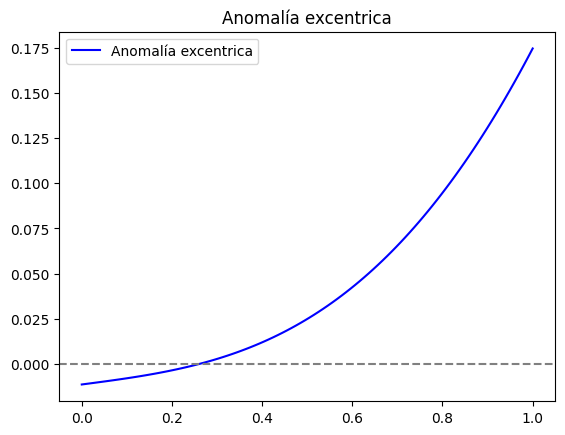

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
e = 0.9672671
T = 75.96
t_0 = 1986.1113
t = 1986 + 91/365
#Hallemos M
M = ((2*np.pi)/T)*(t - t_0)
E = np.linspace(0, 1, 100)
f = lambda E: E - e*np.sin(E) - M
y = f(E)
plt.plot(E, y, label = r'Anomalía excentrica', color = 'blue')
plt.axhline(y = 0, linestyle='--', color = 'grey')
plt.title('Anomalía excentrica')
plt.legend()

In [ ]:
#Método Newton-Rhapson
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):

    aproximaciones = []  # Lista para almacenar las aproximaciones sucesivas

    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)

        # Asegurarse de que df(x0) no sea cero
        if df_x0 == 0:
            raise ValueError("La derivada es cero, el método no puede continuar.")

        # Fórmula de Newton-Raphson
        x1 = x0 - f_x0 / df_x0
        aproximaciones.append(x1)  # Guardar la aproximación en la lista

        # Verificar la condición de convergencia
        if abs(x1 - x0) < tol:
            return x1, aproximaciones  # Retorna la raíz encontrada y la lista de aproximaciones

        # Actualizar el valor para la siguiente iteración
        x0 = x1

    raise RuntimeError("El método no convergió en el número máximo de iteraciones.")

delta_t = T / 100
t = np.arange(t_0, T + t_0 + delta_t, delta_t)
M = ((2*np.pi)/T)*(t - t_0)
E_values = []

for M_0 in M:
  f = lambda E: E - e*np.sin(E) - M_0
  df = lambda E: 1-e*np.cos(E)
  x_0 = M_0
  E_values.append(newton_raphson(f, df, x_0)[0])
E_values




[np.float64(0.0),
 np.float64(0.6421325961085936),
 np.float64(0.8564634614529115),
 np.float64(1.0050532869971316),
 np.float64(1.1233875400063593),
 np.float64(1.2237638239709712),
 np.float64(1.3120624393185836),
 np.float64(1.391601777867297),
 np.float64(1.4644582511440274),
 np.float64(1.532026935700488),
 np.float64(1.5952953669443175),
 np.float64(1.6549911429683508),
 np.float64(1.7116676245281963),
 np.float64(1.7657566583013193),
 np.float64(1.8176025574676815),
 np.float64(1.867484856810171),
 np.float64(1.91563404708371),
 np.float64(1.9622427555227733),
 np.float64(2.0074738792886837),
 np.float64(2.051466624565557),
 np.float64(2.0943410719791853),
 np.float64(2.136201683430555),
 np.float64(2.177140034453526),
 np.float64(2.217236970597994),
 np.float64(2.2565643291143465),
 np.float64(2.2951863281731595),
 np.float64(2.3331606987263),
 np.float64(2.370539614949747),
 np.float64(2.407370465460977),
 np.float64(2.4436964975050044),
 np.float64(2.4795573589378996),
 np.fl

<ipython-input-22-49af6dd21b49>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

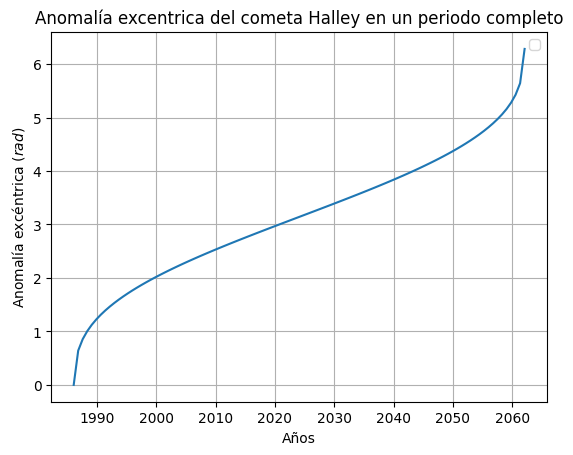

In [ ]:
t = np.arange(t_0, T + t_0 + delta_t, delta_t)
plt.plot(t, E_values) #Arroja 6.28 = 2*pi en 2061 ya que da una vuelta completa
plt.title('Anomalía excentrica del cometa Halley en un periodo completo')
plt.ylabel('Anomalía excéntrica $(rad)$')
plt.xlabel('Años')
plt.grid()
plt.legend()
plt.show

In [ ]:
#Método de la secante
def Secante(f, x_0, x_1, tol = 1e-6, max_iter = 100):
  aproximaciones = [x_0, x_1]
  for i in range(max_iter):
    fx_0 = f(x_0)
    fx_1 = f(x_1)
    if fx_1 - fx_0 == 0:
      raise ValueError('El denomidor del método se hace cero')
    x_2 = x_1 - (f(x_1)*(x_1-x_0)/(f(x_1)-f(x_0)))
    aproximaciones.append(x_2)
    if abs(x_2 - x_1) < tol:
      return x_2, aproximaciones
    x_0 = x_1
    x_1 = x_2
  raise RunTimeError('No convergió en el máximo de iteraciones')
f = lambda E: E - e*np.sin(E) - M_0
delta_t = T / 100
t = np.arange(t_0, T + t_0 + delta_t, delta_t)
M = ((2*np.pi)/T)*(t - t_0)
E_values_sec = []
for i in range(len(M)-1):
  M_0 = M[i]
  M_1 = M[i + 1]
  f = lambda E: E - e*np.sin(E) - M_0
  E_values_sec.append(Secante(f, M_0, M_1)[0])
E_values_sec

[np.float64(0.0),
 np.float64(0.6421325961085939),
 np.float64(0.8564634614444685),
 np.float64(1.0050532869969835),
 np.float64(1.1233875401195388),
 np.float64(1.2237638239713564),
 np.float64(1.3120624393185842),
 np.float64(1.3916017778594192),
 np.float64(1.4644582511439337),
 np.float64(1.532026935700483),
 np.float64(1.5952953669178562),
 np.float64(1.6549911429673168),
 np.float64(1.711667624528161),
 np.float64(1.7657566583013184),
 np.float64(1.8176025575527266),
 np.float64(1.8674848568188045),
 np.float64(1.9156340470845303),
 np.float64(1.962242755522846),
 np.float64(2.0074738792886224),
 np.float64(2.05146662456555),
 np.float64(2.0943410719791844),
 np.float64(2.1362016834091886),
 np.float64(2.1771400344495886),
 np.float64(2.217236970597304),
 np.float64(2.256564329114232),
 np.float64(2.2951863281731417),
 np.float64(2.333160698726297),
 np.float64(2.3705396149497466),
 np.float64(2.407370465460977),
 np.float64(2.4436964974655524),
 np.float64(2.479557358927753),
 n

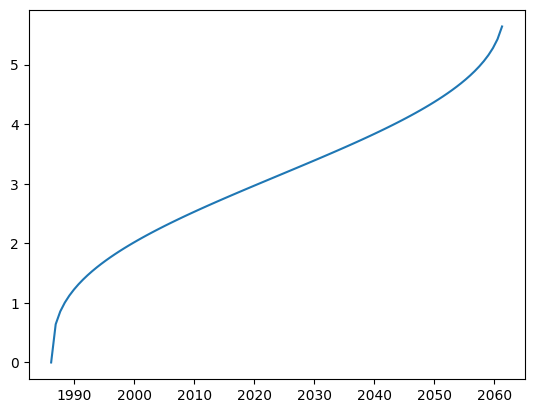

In [ ]:
t_s = np.arange(t_0, t_0 + T - delta_t, delta_t)
plt.plot(t_s, E_values_sec)

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Secante: m = 0.9575
Newton-Raphson: m = 0.9575
Punto fijo: m = 0.9575


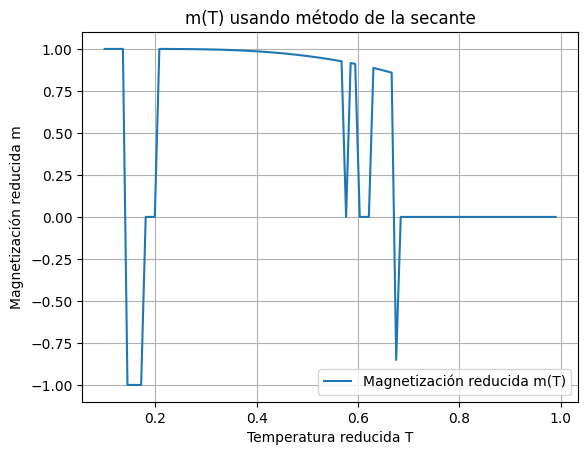

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

# --------------------------
# Parte 1: Análisis para T = 0.5

# Valor fijo de la temperatura reducida
T_val = 0.5

# Definimos la función f(m) = tanh(m/T) - m con T = 0.5
def f_secante(m):
    return np.tanh(m / 0.5) - m

# Derivada de f(m), necesaria para el método de Newton-Raphson
def df_newton(m):
    return (1 / 0.5) * (1 - np.tanh(m / 0.5)**2) - 1

# Función para el método de punto fijo: g(m) = tanh(m/T)
def g_punto_fijo(m):
    return np.tanh(m / 0.5)

# ▸ Método de la secante
sol_secante = root_scalar(f_secante, method='secant', x0=0.1, x1=0.9)
print(f"Secante: m = {sol_secante.root:.4f}")

# ▸ Método de Newton-Raphson
sol_newton = newton(f_secante, x0=0.5, fprime=df_newton)
print(f"Newton-Raphson: m = {sol_newton:.4f}")

# ▸ Método de punto fijo (iteramos hasta que la diferencia sea pequeña)
m_actual = 0.5
for _ in range(100):
    m_siguiente = g_punto_fijo(m_actual)
    if abs(m_siguiente - m_actual) < 1e-6:
        break
    m_actual = m_siguiente
print(f"Punto fijo: m = {m_actual:.4f}")

# --------------------------
# Parte 2: Variamos T y graficamos m(T) con la secante

T_values = np.linspace(0.1, 0.99, 100)  # Temperaturas reducidas
m_values = []  # Lista donde guardamos las soluciones m para cada T

for T in T_values:
    # Redefinimos la función f(m) con el nuevo T
    f_T = lambda m: np.tanh(m / T) - m
    try:
        # Usamos el método de la secante para encontrar la raíz
        sol = root_scalar(f_T, method='secant', x0=0.01, x1=0.9)
        m_values.append(sol.root)
    except:
        m_values.append(np.nan)  # En caso de que no converja

# Graficamos m vs. T
plt.plot(T_values, m_values, label='Magnetización reducida m(T)')
plt.xlabel("Temperatura reducida T")
plt.ylabel("Magnetización reducida m")
plt.title("m(T) usando método de la secante")
plt.grid(True)
plt.legend()
plt.show()


# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



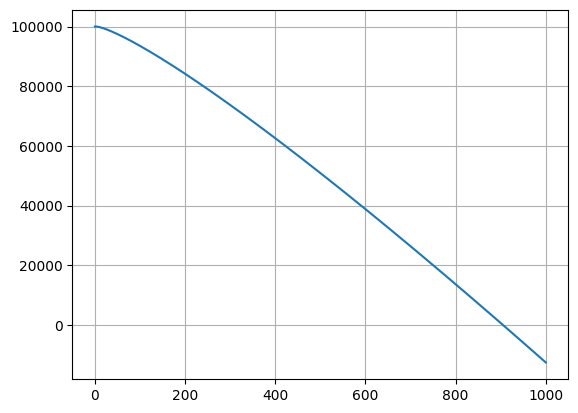

In [2]:
#Graficamos primero para saber entre que valores está la raíz
import numpy as np
import matplotlib.pyplot as plt
def Hallar_T(T):
  R = 8.314 #J/K
  T_0 = 4.444 #J/K
  G = (-10)**5
  return (-R*T*np.log((T/T_0)**2.5))-G
T = np.linspace(0.01, 1000, 1000) #Ln no puede tener números negativos
f = Hallar_T(T)
plt.plot(T, f)
plt.grid()

In [3]:
#Ahora si hallemos la raíz
from scipy.optimize import fsolve
raíz = fsolve(Hallar_T, 850)
print(f'La temperatura a la cual G = -10**5 es {raíz}')

La temperatura a la cual G = -10**5 es [904.97434134]


# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

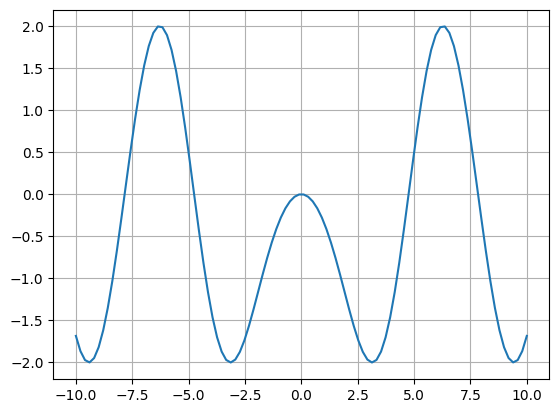

In [69]:
#Graficar l(x) y l_prime(x) en el intervalo de x en [-10,10]
def intensidad(x):
  l_0 = 1
  return l_0 * np.where(x == 0, 1, (np.sin(x) / x)**2)
def intensidad_prime(x):
  l_0 = 1
  return np.where(x == 0, 0, (2*l_0)*(np.cos(x) - (np.sin(x)/x)*(np.sin(x)/x)))

x = np.linspace(-10, 10, 100)
f = intensidad(x)
f_prime = intensidad_prime(x)
plt.plot(x, f_prime)
plt.grid()


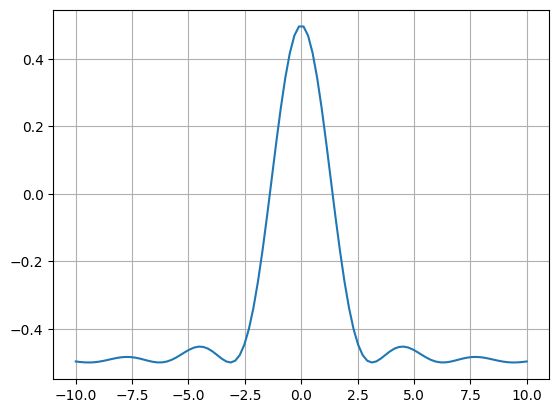

In [70]:
#Segunda parte
from scipy.optimize import newton
def funcion_objetivo(x):
    return intensidad(x) - l_0/2
g = funcion_objetivo(x)
plt.plot(x, g)
plt.grid()
#La función no tiene un cero en x = pi, lo tiene antes en (-2.5, 2.5)

In [18]:
# Función objetivo para raíz: I(x) - I0/2


# Método de la secante para hallar la x entre -2.5 y 0
x0 = -2.5     # primer aproximación
x1 = 0   # segunda aproximación

x_half = newton(funcion_objetivo, x0, x1=x1)
print(f'El valor positivo x1/2 donde I(x) = I0/2 es aproximadamente: {x_half}')

El valor positivo x1/2 donde I(x) = I0/2 es aproximadamente: -1.3915573782515103


<ipython-input-15-9fabf75b6956>:4: RuntimeWarning: invalid value encountered in scalar divide
  return l_0 * np.where(x == 0, 1, (np.sin(x) / x)**2)


In [28]:
#Hallemos el primer máximos local
x_0_1 = -7.5
x_1_1 = -5
max_local_1 = newton(intensidad_prime, x_0_1, x1 = x_1_1)
print(f'El primer máximo local se halla en x = {max_local_1}')
#Segundo máximo local
x_0_2 = -2.5
x_1_2 = 1
max_local_2 = newton(intensidad_prime, x_0_2, x1 = x_1_2)
print(f'El segundo máximo local se halla en x = {max_local_2}')
#Tercer máximo local
x_0_3 = 5
x_1_3 = 7.5
max_local_2 = newton(intensidad_prime, x_0_3, x1 = x_1_3)
print(f'El tercer máximo local se halla en x = {max_local_3}')

El primer máximo local se halla en x = -4.756517243187497
El segundo máximo local se halla en x = -2.138056138627048e-08
El tercer máximo local se halla en x = 4.756517243187497


In [44]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        fa = f(a)
        fb = f(b)
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)

        if abs(fc) < tol:
            return c

        if fa * fc < 0:
            b = c
        else:
            a = c

    raise ValueError("No se encontró raíz en el número máximo de iteraciones")

# Ejemplo para encontrar una raíz positiva de la derivada
a = -9
b = -7

if intensidad_prime(a) * intensidad_prime(b) > 0:
    raise ValueError("f(a) y f(b) no tienen signos opuestos. No se garantiza que haya una raíz en [a, b].")

x_raiz = regula_falsi(intensidad_prime, a, b)
print(f'\nLa raíz de intensidad_prime(x) en [{a}, {b}] es aproximadamente: {x_raiz:.6f}')



La raíz de intensidad_prime(x) en [-9, -7] es aproximadamente: -7.837706


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

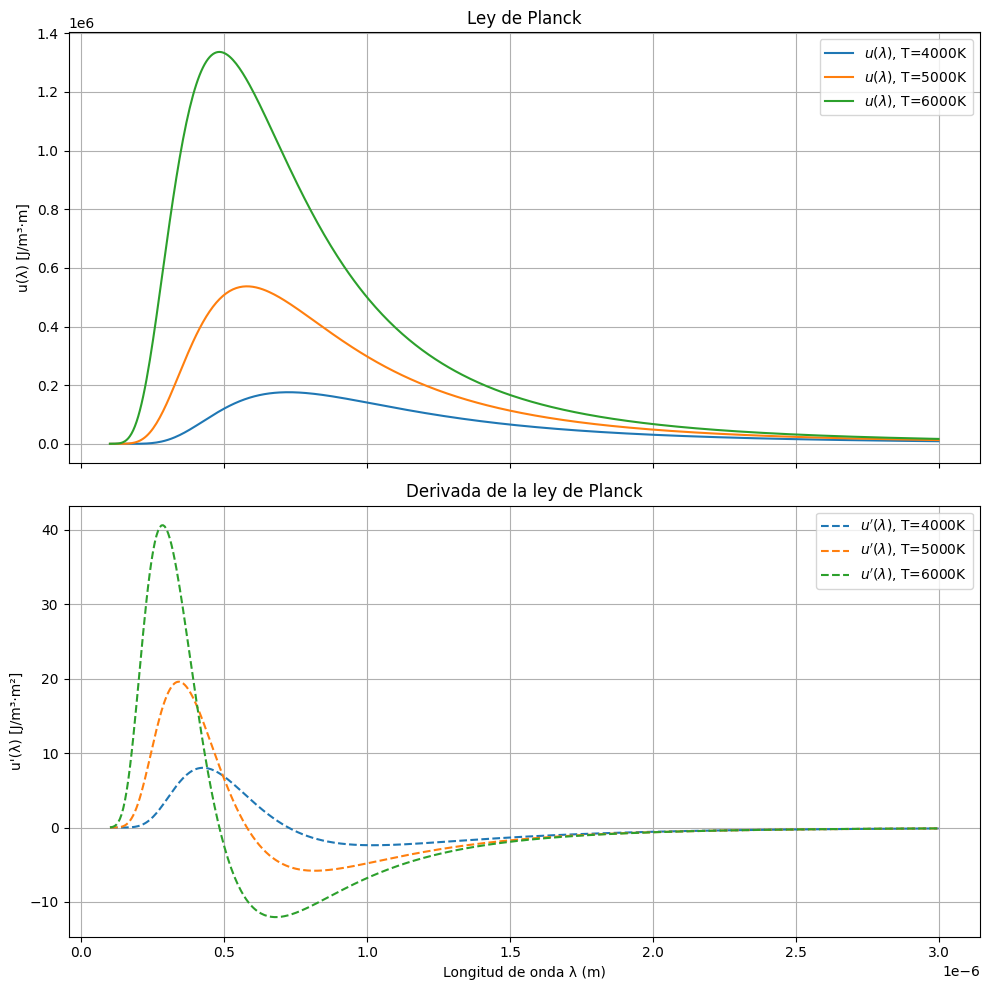

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h = 6.626 * 10**-34  # J·s
k_B = 1.381 * 10**-23  # J/K
c = 2.998 * 10**8  # m/s

# Función de la ley de Planck
def ley_de_Planck(K, x, landa_0):
    return K * (1 / (x**5) * (np.exp(1/x) - 1)**-1)

# Derivada de la ley de Planck
def derivada_ley_de_Planck(K, x, landa_0):
    # expresión corregida de la derivada
    return K * landa_0 * (((5 * x) + (1 - 5 * x) * np.exp(1/x)) / ((x**7) * (np.exp(1/x) - 1)**2))

# Valores de temperatura y longitud de onda
T_values = [4000, 5000, 6000]
landa_values = np.linspace(1e-7, 3e-6, 500)

# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Graficar u(λ) y u'(λ) por separado
for T in T_values:
    landa_0 = (h * c) / (k_B * T)
    x = landa_values / landa_0
    K = (8 * np.pi * k_B * T) / (landa_0**4)

    u = ley_de_Planck(K, x, landa_0)
    du = derivada_ley_de_Planck(K, x, landa_0)

    ax1.plot(landa_values, u, label=f"$u(\lambda)$, T={T}K")
    ax2.plot(landa_values, du, '--', label=f"$u'(\lambda)$, T={T}K")

# Ajustes de la primera gráfica
ax1.set_ylabel("u(λ) [J/m³·m]")
ax1.set_title("Ley de Planck")
ax1.grid(True)
ax1.legend()

# Ajustes de la segunda gráfica
ax2.set_xlabel("Longitud de onda λ (m)")
ax2.set_ylabel("u'(λ) [J/m³·m²]")
ax2.set_title("Derivada de la ley de Planck")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()



In [67]:
from scipy.optimize import bisect, newton
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h = 6.626e-34
k_B = 1.381e-23
c = 2.998e8

# Temperatura
T = 5778  # Kelvin

# Definir u(λ) directamente
def u_lambda(landa):
    a = 2.0 * h * c**2
    b = h * c / (landa * k_B * T)
    return a / (landa**5 * (np.exp(b) - 1))

# Derivada numérica de u(λ)
def derivada_u_lambda(landa, delta=1e-11):
    return (u_lambda(landa + delta) - u_lambda(landa - delta)) / (2 * delta)

# Encontrar λ_max
landa_max = bisect(derivada_u_lambda, 1e-7, 3e-6)
landa_max_2 = newton(derivada_u_lambda, x0 = 1e-7)
print(f"λ_max por bisección = {landa_max:.4e} m")
print(f"λ_max por newton = {landa_max_2:.4e} m")

λ_max por bisección = 5.0140e-07 m
λ_max por newton = 1.0010e-04 m


In [68]:
# Validar Ley de Wien
producto = landa_max * T
wien = 2.898e-3  # m·K
error_relativo = abs(producto - wien) / wien * 100
print(f"λ_max · T = {producto:.4e} m·K")
print(f"Error relativo: {error_relativo:.4f}%")


λ_max · T = 2.8971e-03 m·K
Error relativo: 0.0319%


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

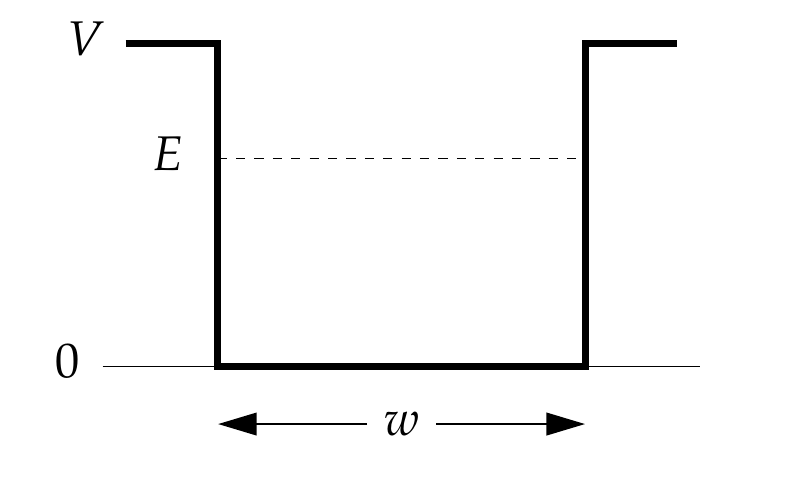

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

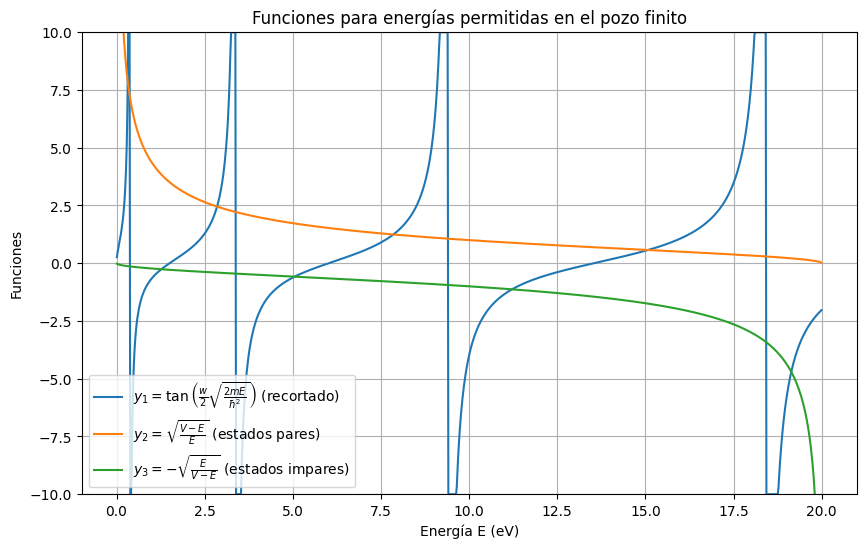

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
m = 9.11e-31           # masa del electrón (kg)
w = 1e-9               # ancho del pozo (m)
V_eV = 20              # altura del pozo en eV
eV_to_J = 1.602e-19    # conversión eV a Joules
hbar = 1.0545718e-34   # constante de Planck reducida (J·s)

# Convertir V a Joules
V = V_eV * eV_to_J

# Rango de energías en eV, evitando valores exactamente 0 y V para no dividir por cero
E_eV = np.linspace(0.01, V_eV - 0.01, 1000)  # evitar extremos para evitar división por cero

# Convertir energías a Joules
E = E_eV * eV_to_J

# Calcular las funciones
# Argumento del tan
arg = (w / 2) * np.sqrt(2 * m * E / hbar**2)
y1 = np.tan(arg)

# Evitar valores donde tan() explota para que el gráfico se vea bien
# Por ejemplo, limitar y1 a un rango para visualizar mejor
y1_clip = np.clip(y1, -10, 10)

y2 = np.sqrt((V - E) / E)
y3 = - np.sqrt(E / (V - E))

# Graficar
plt.figure(figsize=(10, 6))

plt.plot(E_eV, y1_clip, label=r'$y_1 = \tan\left(\frac{w}{2}\sqrt{\frac{2mE}{\hbar^2}}\right)$ (recortado)')
plt.plot(E_eV, y2, label=r'$y_2 = \sqrt{\frac{V-E}{E}}$ (estados pares)')
plt.plot(E_eV, y3, label=r'$y_3 = -\sqrt{\frac{E}{V-E}}$ (estados impares)')

plt.xlabel('Energía E (eV)')
plt.ylabel('Funciones')
plt.title('Funciones para energías permitidas en el pozo finito')
plt.ylim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()


In [79]:
import numpy as np
from scipy.optimize import bisect

# Constantes
m = 9.11e-31  # kg
w = 1e-9      # m
hbar = 1.0545718e-34  # J·s
eV_to_J = 1.602e-19
V0_eV = 20  # Potencial en eV

# k en función de E (en eV)
def k(E_eV):
    E = E_eV * eV_to_J
    return np.sqrt((w**2 * m * E) / (2 * hbar**2))

# Función f(E) según si el estado es par o impar
def f(E_eV, n):
    if E_eV <= 0 or E_eV >= V0_eV:
        return np.nan
    try:
        if n % 2 == 0:
            return np.tan(k(E_eV)) - np.sqrt((V0_eV - E_eV) / E_eV)
        else:
            return np.tan(k(E_eV)) + np.sqrt(E_eV / (V0_eV - E_eV))
    except:
        return np.nan

# Buscar raíces con bisección
def encontrar_niveles(n_niveles):
    niveles = []
    E_vals = np.linspace(0.001, V0_eV - 0.001, 10000)

    for n in range(n_niveles):
        for i in range(len(E_vals) - 1):
            E1, E2 = E_vals[i], E_vals[i+1]
            y1, y2 = f(E1, n), f(E2, n)
            if np.isnan(y1) or np.isnan(y2):
                continue
            if y1 * y2 < 0:
                try:
                    raiz = bisect(lambda E: f(E, n), E1, E2, xtol=0.001)
                    niveles.append(round(raiz, 3))
                    break
                except:
                    continue
    return niveles

# Ejecutar
niveles = encontrar_niveles(6)

# Imprimir resultados
print("Primeros seis niveles de energía (en eV):")
for i, E in enumerate(niveles):
    print(f"Nivel {i}: {E:.3f} eV")



Primeros seis niveles de energía (en eV):
Nivel 0: 0.318 eV
Nivel 1: 0.376 eV
Nivel 2: 0.318 eV
Nivel 3: 0.376 eV
Nivel 4: 0.318 eV
Nivel 5: 0.376 eV


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [80]:
from scipy.optimize import root_scalar

# Constantes físicas
G = 6.674e-11         # Constante gravitacional (m^3/kg/s^2)
M = 5.974e24          # Masa de la Tierra (kg)
m = 7.348e22          # Masa de la Luna (kg)
R = 3.844e8           # Distancia Tierra-Luna (m)
omega = 2.662e-6      # Velocidad angular (1/s)

# Función que representa la ecuación a resolver
def f(r):
    return (G * M / r**2) - (G * m / (R - r)**2) - omega**2 * r

# Usamos el método de Newton SIN derivada (usa secante internamente)
sol = root_scalar(f, method='newton', x0=1e8, x1=2e8)  # x0 y x1 = valores iniciales

# Mostrar resultado
if sol.converged:
    print(f" El punto L1 está a unos {sol.root:.2f} m del centro de la Tierra.")
else:
    print("No se encontró la raíz.")


📍 El punto L1 está a unos 326045071.67 m del centro de la Tierra.
